<a href="https://colab.research.google.com/github/Shital3010/SLR/blob/master/Copy_of_Project_on_Binary_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary logistic regression

In [ ]:
#importing librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score     
from sklearn.metrics import roc_curve

In [ ]:
data=pd.read_csv(r'C:\Users\Amit Sahani\Desktop\project and searches\may end project work\binary.csv')

In [ ]:
data.head()

,Gender,Age,Education,Occupation,Number of family members,location,Income,hospital preference
0,0,45,4,5,4,2,3,1
1,1,56,2,7,6,2,3,0
2,1,22,5,3,3,2,4,1
3,0,22,5,3,4,4,3,1
4,1,22,5,3,4,2,4,1


In [ ]:
data.shape

(328, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
Gender                      328 non-null int64
Age                         328 non-null int64
Education                   328 non-null int64
Occupation                  328 non-null int64
Number of family members    328 non-null int64
location                    328 non-null int64
Income                      328 non-null int64
hospital preference         328 non-null int64
dtypes: int64(8)
memory usage: 20.6 KB


In [ ]:
list(data.columns)

['Gender',
 'Age',
 'Education ',
 'Occupation ',
 'Number of family members',
 'location',
 'Income ',
 'hospital preference']

In [ ]:
data.isnull().sum()

Gender                      0
Age                         0
Education                   0
Occupation                  0
Number of family members    0
location                    0
Income                      0
hospital preference         0
dtype: int64

In [ ]:
##converting into the categorical values

cols=['Gender',
 'Education ',
 'Occupation ',
 'location',
 'Income ',
 'hospital preference']

for col in cols:
    data[col]=data[col].astype("category")
   
print (data.dtypes)

Gender                      category
Age                            int64
Education                   category
Occupation                  category
Number of family members       int64
location                    category
Income                      category
hospital preference         category
dtype: object


In [ ]:
data.describe()

,Age,Number of family members
count,328.000000,328.000000
mean,31.192073,4.317073
std,12.405348,1.169208
min,18.000000,3.000000
25%,22.000000,4.000000
50%,25.000000,4.000000
75%,41.000000,5.000000
max,75.000000,15.000000


In [ ]:
data.describe(include='all')

,Gender,Age,Education,Occupation,Number of family members,location,Income,hospital preference
count,328.0,328.000000,328.0,328.0,328.000000,328.0,328.0,328.0
unique,2.0,NaN,6.0,6.0,NaN,5.0,6.0,2.0
top,0.0,NaN,4.0,5.0,NaN,2.0,4.0,1.0
freq,166.0,NaN,200.0,147.0,NaN,228.0,117.0,243.0
mean,NaN,31.192073,NaN,NaN,4.317073,NaN,NaN,NaN
std,NaN,12.405348,NaN,NaN,1.169208,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,3.000000,NaN,NaN,NaN
25%,NaN,22.000000,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,25.000000,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,41.000000,NaN,NaN,5.000000,NaN,NaN,NaN


In [ ]:
x=data.iloc[:,:-1].values   #feature
y=data.iloc[:,7].values     #target

In [ ]:
x.shape

(328, 7)

In [ ]:
y.shape

(328,)

# visualize

In [ ]:
data['Gender'].value_counts()

0    166
1    162
Name: Gender, dtype: int64

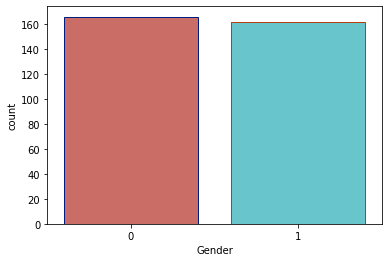

In [ ]:
sns.countplot(x=data.iloc[:,0],data=data,palette= "hls",edgecolor=sns.color_palette("dark", 3))

In [ ]:
data.iloc[:,2].value_counts()

4    200
5     76
3     36
2     10
6      4
1      2
Name: Education , dtype: int64

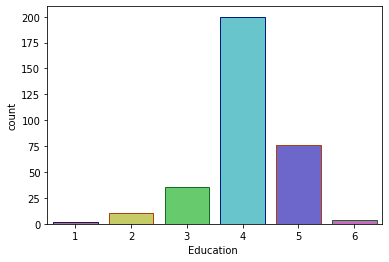

In [ ]:
sns.countplot(x=data.iloc[:,2],data=data,palette= "hls",edgecolor=sns.color_palette("dark", 3))

In [ ]:
data.iloc[:,3].value_counts()

5    147
3    126
2     23
7     17
6     11
4      4
Name: Occupation , dtype: int64

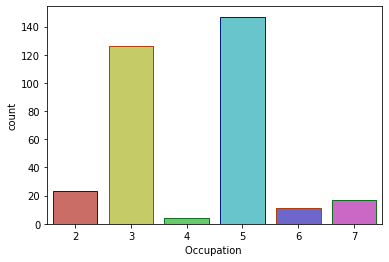

In [ ]:
sns.countplot(x=data.iloc[:,3],data=data,palette= "hls",edgecolor=sns.color_palette("dark", 3))

In [ ]:
data.iloc[:,5].value_counts()

2    228
1     53
3     29
4     13
5      5
Name: location, dtype: int64

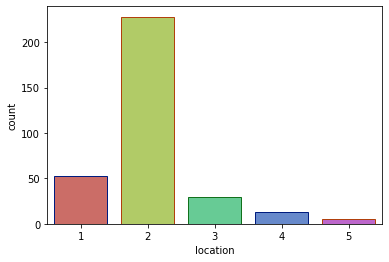

In [ ]:
sns.countplot(x=data.iloc[:,5],data=data,palette= "hls",edgecolor=sns.color_palette("dark", 3))

In [ ]:
data.iloc[:,6].value_counts()

4    117
3     98
5     42
2     33
6     27
1     11
Name: Income , dtype: int64

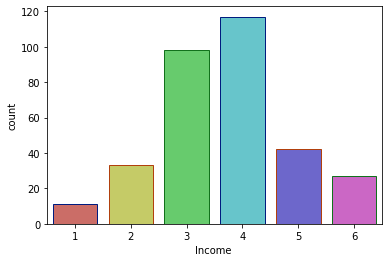

In [ ]:
sns.countplot(x=data.iloc[:,6],data=data,palette= "hls",edgecolor=sns.color_palette("dark", 3))

In [ ]:
data.iloc[:,7].value_counts()

1    243
0     85
Name: hospital preference, dtype: int64

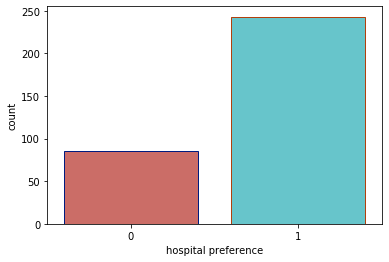

In [ ]:
sns.countplot(x=data.iloc[:,7],data=data,palette= "hls",edgecolor=sns.color_palette("dark", 3))

In [ ]:
## print the numerical values in the data
data_num = data.select_dtypes(include = ['float64', 'int64'])     
data_num.head()   #df_not_num = df.select_dtypes(include = ['O'])             
print('There is {} numerical features including:\n{}'.format(len(data_num.columns), data_num.columns.tolist()))

There is 2 numerical features including:
['Age', 'Number of family members']


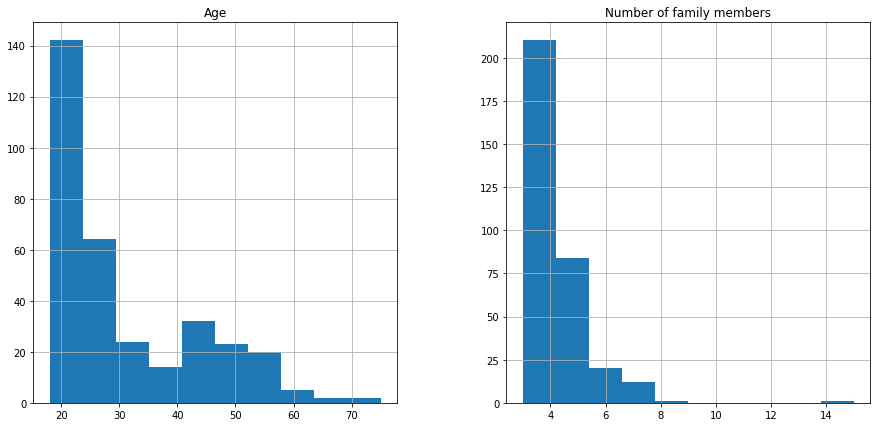

In [ ]:
data_num.hist(figsize=(15,7),xlabelsize=10, ylabelsize=10);

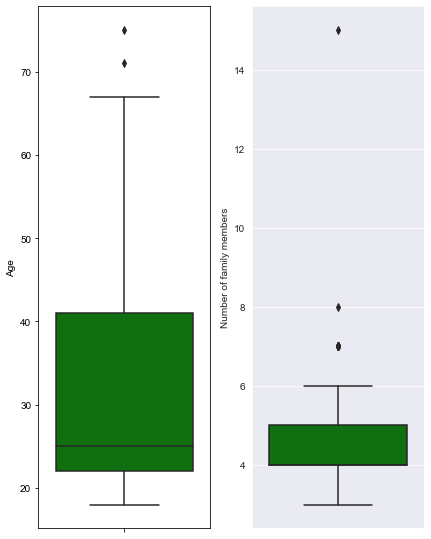

In [ ]:
l = data_num.columns.values           ##print col names
number_of_figcolumns= 5
number_of_rows = len(l)-1/number_of_figcolumns
plt.figure(figsize=(15,15))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_figcolumns,i+1)
    sns.set_style('darkgrid')
    sns.boxplot(data_num[l[i]],color='green',orient='v')
    plt.tight_layout()

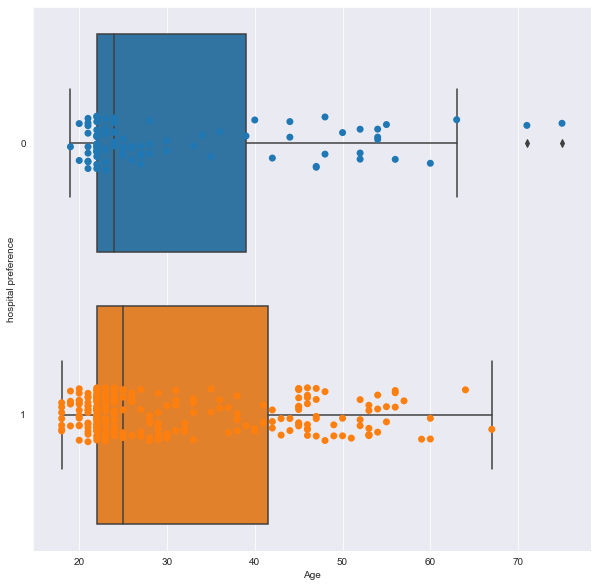

In [ ]:
plt.figure(figsize = (10,10))            ##categorical target variable and continuous feature variable
ax= sns.boxplot(data = data,
                x = data.iloc[:,1], y = data.iloc[:,7])
ax= sns.stripplot(data = data,
                   x = data.iloc[:,1], y = data.iloc[:,7], jitter=True, edgecolor="gray", s = 7)
plt.show()

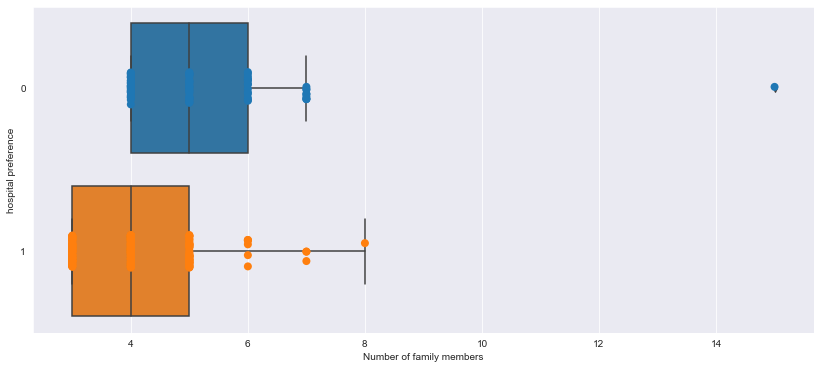

In [ ]:
plt.figure(figsize = (14,6))            ##categorical target variable and continuous feature variable
ax= sns.boxplot(data = data,
                x = data.iloc[:,4], y = data.iloc[:,7])
ax= sns.stripplot(data = data,
                   x = data.iloc[:,4], y = data.iloc[:,7], jitter=True, edgecolor="gray", s = 8)
plt.show()

# splitting the dataset

In [ ]:
x = data.iloc[:,:-1].values
y = data['hospital preference']

In [ ]:
# Splitting the dataset into training and test set.  

from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=90) 

In [ ]:
#Feature Scaling of datasets  

from sklearn.preprocessing import StandardScaler  

st_x= StandardScaler()  

x_train= st_x.fit_transform(x_train)  

x_test= st_x.transform(x_test)  

# Model fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Amit Sahani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.coef_

array([[-0.08187631,  0.04057024,  0.40375663,  0.13461327, -0.92631812,
         0.14323929,  1.27703262]])

In [ ]:
model.score(x_train,y_train)   #accuracy of train set

0.8861788617886179

# Validating

In [ ]:
model.predict(x_train)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[15,  7],
       [ 2, 58]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.89      0.97      0.93        60

    accuracy                           0.89        82
   macro avg       0.89      0.82      0.85        82
weighted avg       0.89      0.89      0.89        82



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8902439024390244
Precision: 0.8923076923076924
Recall: 0.9666666666666667


In [ ]:
print("Accuracy on training set :",format(model.score(x_train,y_train)))
print("Accuracy on test set :",format(model.score(x_test,y_test)))

Accuracy on training set : 0.8861788617886179
Accuracy on test set : 0.8902439024390244


# Roc plot

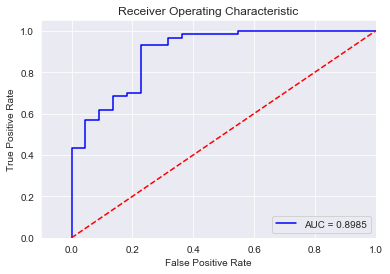

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()